In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import matplotlib.image as mpimg
from db_utils import *

%matplotlib inline

Using TensorFlow backend.


#### Donwload data and preprocess them
The data set can be found over here: 
http://vision.stanford.edu/aditya86/ImageNetDogs/main.html


In [2]:
# Simplify the classification problem to 15 breeds
X_train_orig, Y_train, X_test_orig, Y_test = load_datasets()

In [3]:
print ("number of training examples = " + str(X_train_orig.shape[0]))
print ("number of test examples = " + str(X_test_orig.shape[0]))
print ("X_train shape: " + str(X_train_orig.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test_orig.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1500
number of test examples = 1306
X_train shape: (1500, 114, 100, 3)
Y_train shape: (1500, 1)
X_test shape: (1306, 114, 100, 3)
Y_test shape: (1306, 1)


In [4]:
# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

In [5]:
Y_train = Y_train - 1;
Y_test = Y_test - 1;

### Build model 
get idea from Alex Model:
I will use the similar configuration for the filter dimensions, except that there won't be so many layers
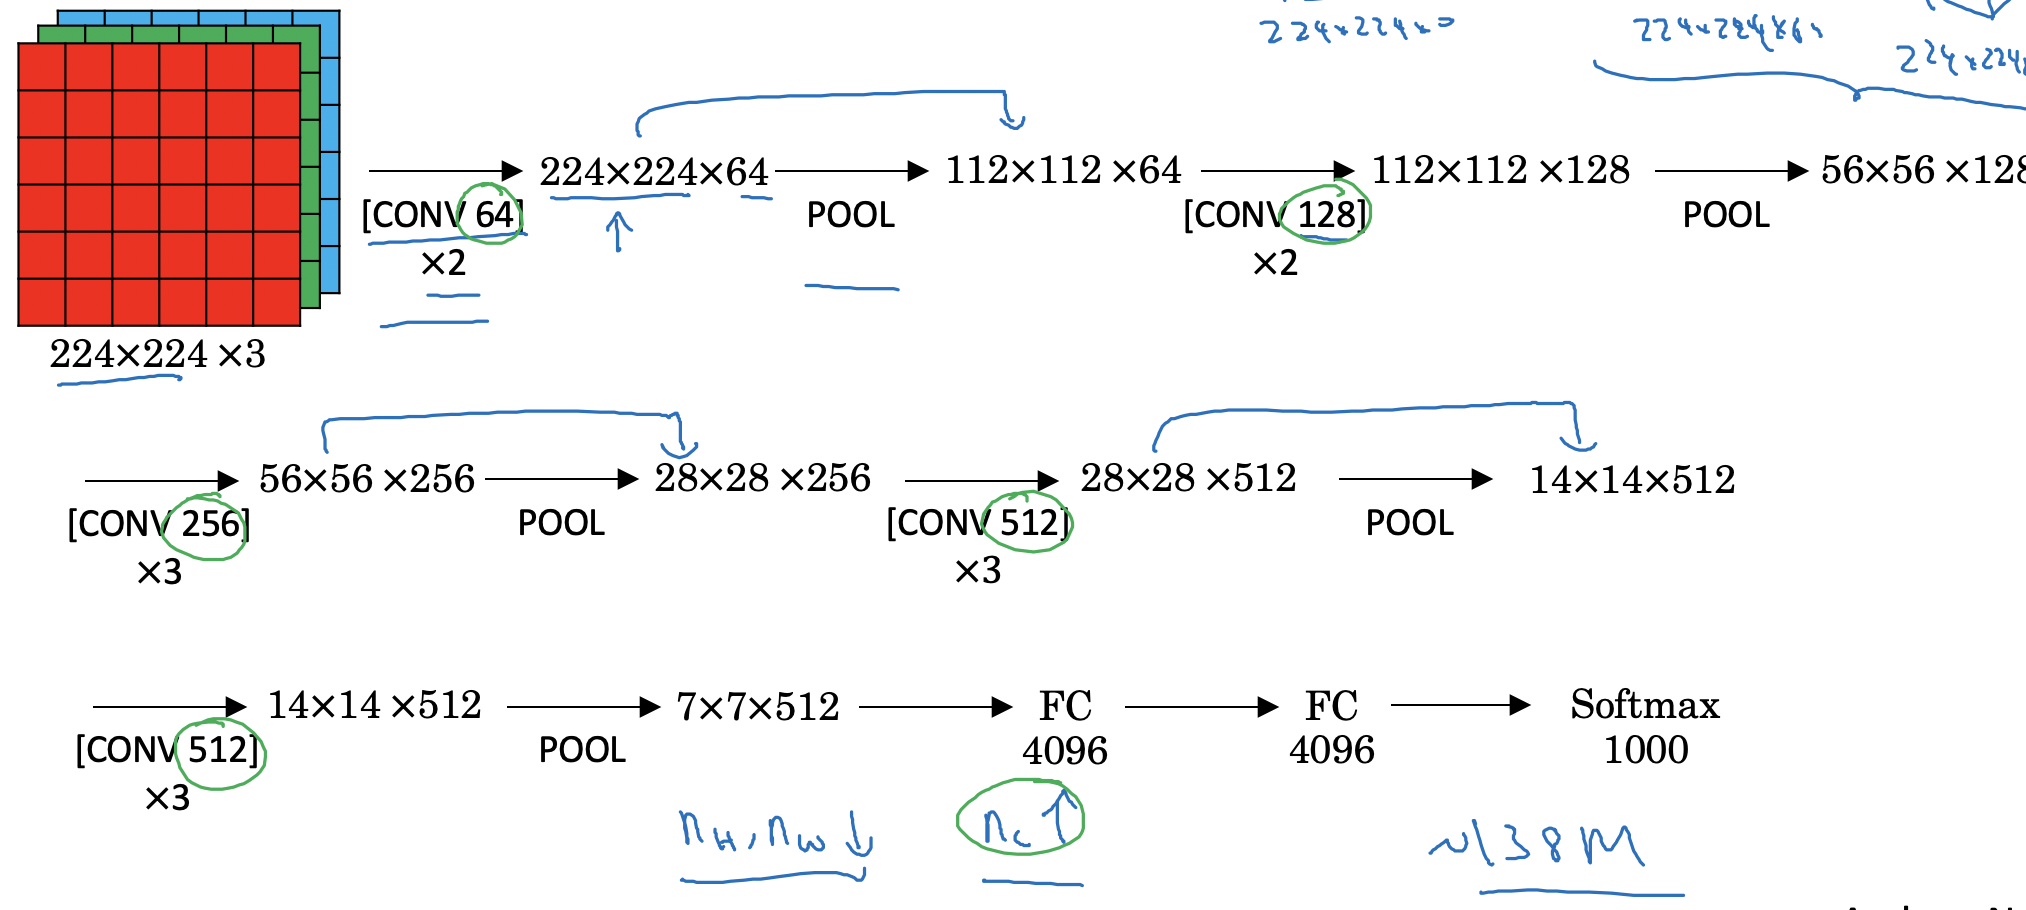

In [39]:
def DogBreedCNNModel(input_shape):
    X_input = Input(input_shape)
    X = Flatten()(X_input)
    X = Dense(32, activation='relu', name='fc0')(X)
    X = Dense(16, activation='relu', name='fc1')(X)
    X = Dense(8, activation='relu', name='fc2')(X)
    X = Dense(15, activation='softmax', name='output')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='DogBreedCNN')
    
    return model
    

In [40]:
dogBreedModel = DogBreedCNNModel(X_train[0].shape);

In [41]:
dogBreedModel.compile('sgd','sparse_categorical_crossentropy',metrics=['accuracy'])

In [42]:
import time
tic = time.clock()
dogBreedModel.fit(X_train,Y_train,epochs=40,batch_size=100);
toc = time.clock();

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Epoch 1/40
1500/1500 [==============================] - 1s 418us/step - loss: 2.7193 - acc: 0.0693
Epoch 2/40
1500/1500 [==============================] - 0s 169us/step - loss: 2.7072 - acc: 0.0640
Epoch 3/40
1500/1500 [==============================] - 0s 169us/step - loss: 2.7048 - acc: 0.0707
Epoch 4/40
1500/1500 [==============================] - 0s 169us/step - loss: 2.6983 - acc: 0.0820
Epoch 5/40
1500/1500 [==============================] - 0s 166us/step - loss: 2.6959 - acc: 0.0920
Epoch 6/40
1500/1500 [==============================] - 0s 167us/step - loss: 2.6847 - acc: 0.0920
Epoch 7/40
1500/1500 [==============================] - 0s 165us/step - loss: 2.6784 - acc: 0.0927
Epoch 8/40
1500/1500 [==============================] - 0s 166us/step - loss: 2.6791 - acc: 0.0913
Epoch 9/40
1500/1500 [==============================] - 0s 167us/step - loss: 2.6692 - acc: 0.0867
Epoch 10/40
1500/1500 [==============================] - 0s 169us/step - loss: 2.6750 - acc: 0.0920
Epoch 11/

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  after removing the cwd from sys.path.


In [43]:
### START CODE HERE ### (1 line)
preds = dogBreedModel.evaluate(X_test,Y_test,batch_size=100, verbose=1);
### END CODE HERE ###
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))
print()
print("Total Training Time: " + str(toc - tic) + " sec")

1306/1306 [==============================] - 0s 214us/step

Loss = 2.6170188619385817
Test Accuracy = 0.16845329331197015

Total Training Time: 28.392389999999978 sec
